# Potential Energy Surface Plotter

In [1]:
# from IPython.display import Image

In [2]:
# file = ('../images/Grabow_plots/Grabow_PES.png')
# Image(filename=file, width = 900) 

we are missing CO2 mechanism, so let's compare thermo and barriers for CO2, CO2X, HCOOX, HCOOHX, CH3O2X, and CH2OX

# plotting potential energy surface

the following takes a cantera cti/yaml file and loads it as a gas solution object and a surface Interface object. the species enthalpies and activation energies are plotted using the pes_plot object

In [3]:
import cantera as ct
from IPython.display import Image
from sbr import sbr
%matplotlib inline

import os
import sys
sys.path.append(f'{os.getcwd()}/tools')
import pes_plot
import numpy as np


# get current RMG model:
# get current RMG model:
rmg_model_folder = "../../../meOH-synthesis/"
cti_file_path = rmg_model_folder + "base/cantera/chem_annotated.cti"

/work/westgroup/ChrisB/_01_MeOH_repos/meOH-analysis/cantera_simulations/RMG_model_analysis


In [4]:
pes_plot_1 = pes_plot.pes_plot(cti_file_path)

In [5]:
pes_plot_1.surf.TP=298,ct.one_atm

## comparing rate from Eric Hermes
for reaction CH2O\*(20) + H\*(10) <=> H2X(53) + HCO\*(16)

In [6]:
listy = pes_plot_1.surf.reaction_equations()
for i,j in enumerate(listy):
    if j == 'CH2O*(20) + H*(10) <=> H2*(37) + HCO*(16)':
        print(pes_plot_1.surf.reaction_equation(i),i)


CH2O*(20) + H*(10) <=> H2*(37) + HCO*(16) 109


concentrations (kmol^2/m^4)\* rate constant (M^2/kmol/s)

(M^2/kmol/s)\*site density(mol/cm^2)\*(100^2cm^2/m^2)\*(1 mol/ 10^3 kmol)

In [7]:
kf = pes_plot_1.surf.forward_rate_constants[109]*(2.943e-9*100**2)*1e-3

In [8]:
pes_plot_1.surf.forward_rate_constants[109]

1.6231863770658964e-06

In [9]:
"{:e}".format(pes_plot_1.surf.forward_rate_constants[109]*(2.943e-9*100**2)*1e-3)

'4.777038e-14'

In [10]:
kr = pes_plot_1.surf.reverse_rate_constants[109]*(2.943e-9*100**2)*1e-3

In [11]:
"{:e}".format(pes_plot_1.surf.reverse_rate_constants[109]*(2.943e-9*100**2)*1e-3)

'3.268766e-17'

In [12]:
pes_plot_1.surf.equilibrium_constants[109]

1461.419220353901

In [13]:
kf/kr

1461.419220353901

1eV = 96kJ/mol = 9.6e4 J/mol

$k = A*e^{(-Ea/RT)}$  

$A = \frac{k_{f}}{e^{E_a /RT}}$

reported values from eric hermes: 

$k_f = 6.456258*10^{-14}$ $s^{-1}$    

$E_a = 1.537$ $eV$

In [14]:
kf_eric = 6.456258e-14/(2.943e-9*100**2) # m^3/mol/s
kf_eric

2.1937675840978593e-09

In [15]:
Ea_eric = 1.537*9.6e4 # J/mol
Ea_eric

147552.0

In [16]:
R = 8.3145 #J/mol/K

A = kf_eric/(np.exp(-Ea_eric/(R*298)))
A

1.599845633664351e+17

## PES plots

In [17]:
pes_plot_1.surf.equilibrium_constants[117]

127761.5691129204

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


[[(3, '--', 1, 'k')],
 [(4, '--', 1, 'k')],
 [(5, '--', 1, 'k')],
 [(6, '--', 1, 'k')],
 [(7, '--', 1, 'k')],
 [(8, '--', 1, 'k')],
 [],
 [],
 []]

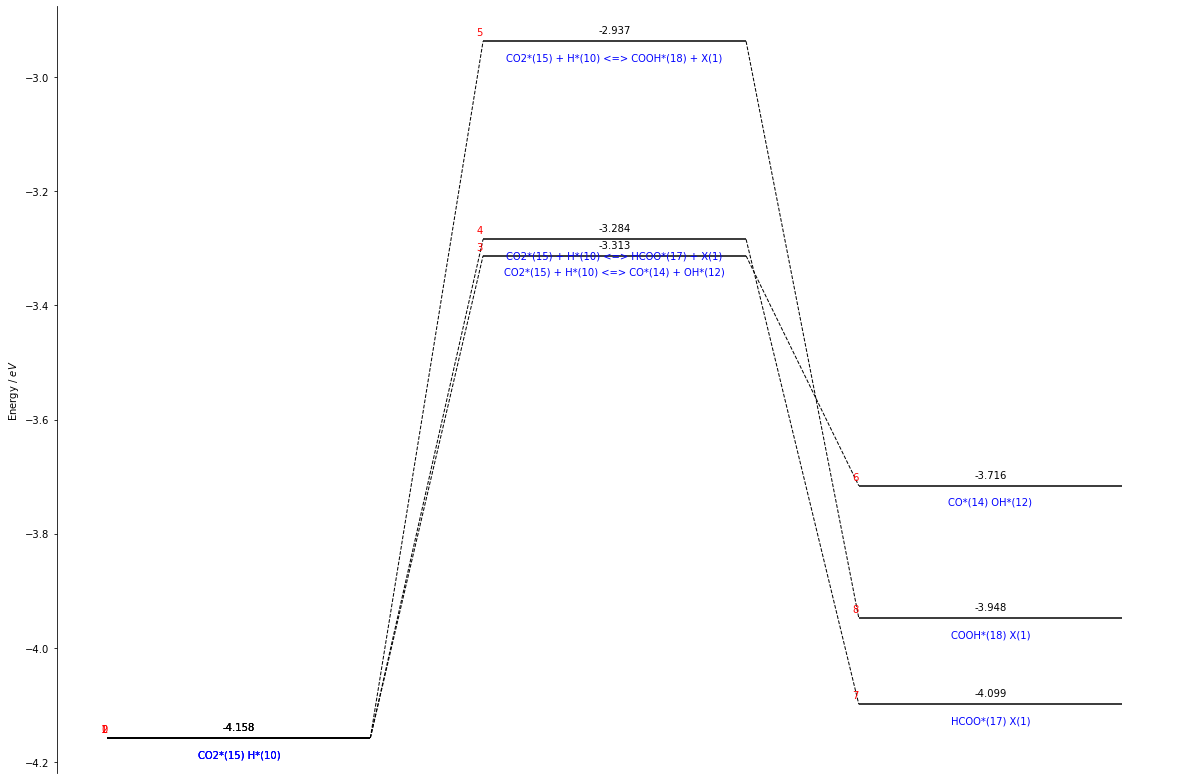

In [18]:
pes_plot_1.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)
pes_plot_1.diagram.links

In [19]:
pes_plot_1.pes_rxn_dict

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b0fe103ea10>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eb10>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eed0>}

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b0fe103ea10>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eb10>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eed0>}

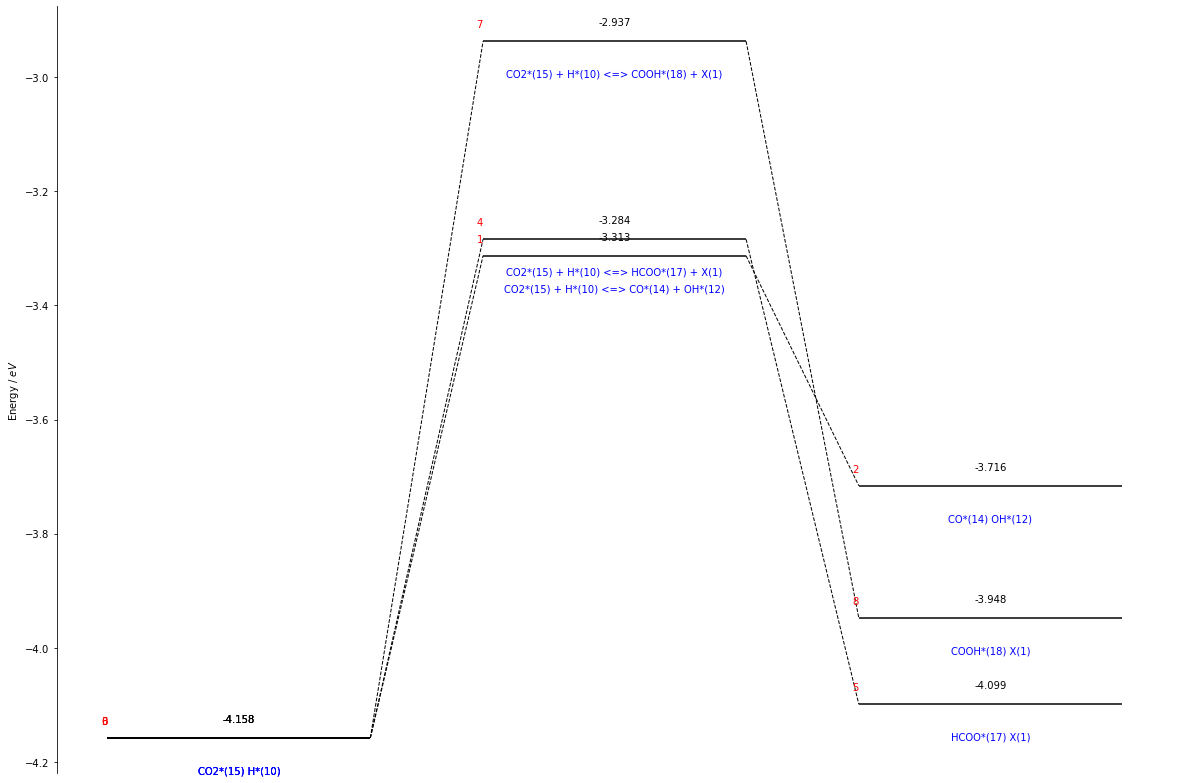

In [20]:
pes_plot_1.trim(" CO2*(15) + H*(10) <=> CO*(14) + OH*(12) ")
pes_plot_1.pes_rxn_dict

In [21]:
pes_plot_1.pes_rxn_dict

{'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)': <pes_plot.pes_reaction_combine at 0x2b0fe103ea10>,
 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eb10>,
 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)': <pes_plot.pes_reaction_combine at 0x2b0fe103eed0>}

['HCOO*(17)', 'X(1)']
flipped equation:  CO2*(15) + H*(10) <=> HCOO*(17) + X(1) HCOO*(17) + X(1) <=> CO2*(15) + H*(10)


[[],
 [(2, '--', 1, 'k')],
 [],
 [],
 [(5, '--', 1, 'k')],
 [],
 [(1, '--', 1, 'k'), (4, '--', 1, 'k'), (7, '--', 1, 'k')],
 [(8, '--', 1, 'k')],
 [],
 [(11, '--', 1, 'k')],
 [(12, '--', 1, 'k')],
 [(13, '--', 1, 'k')],
 [(14, '--', 1, 'k')],
 [],
 []]

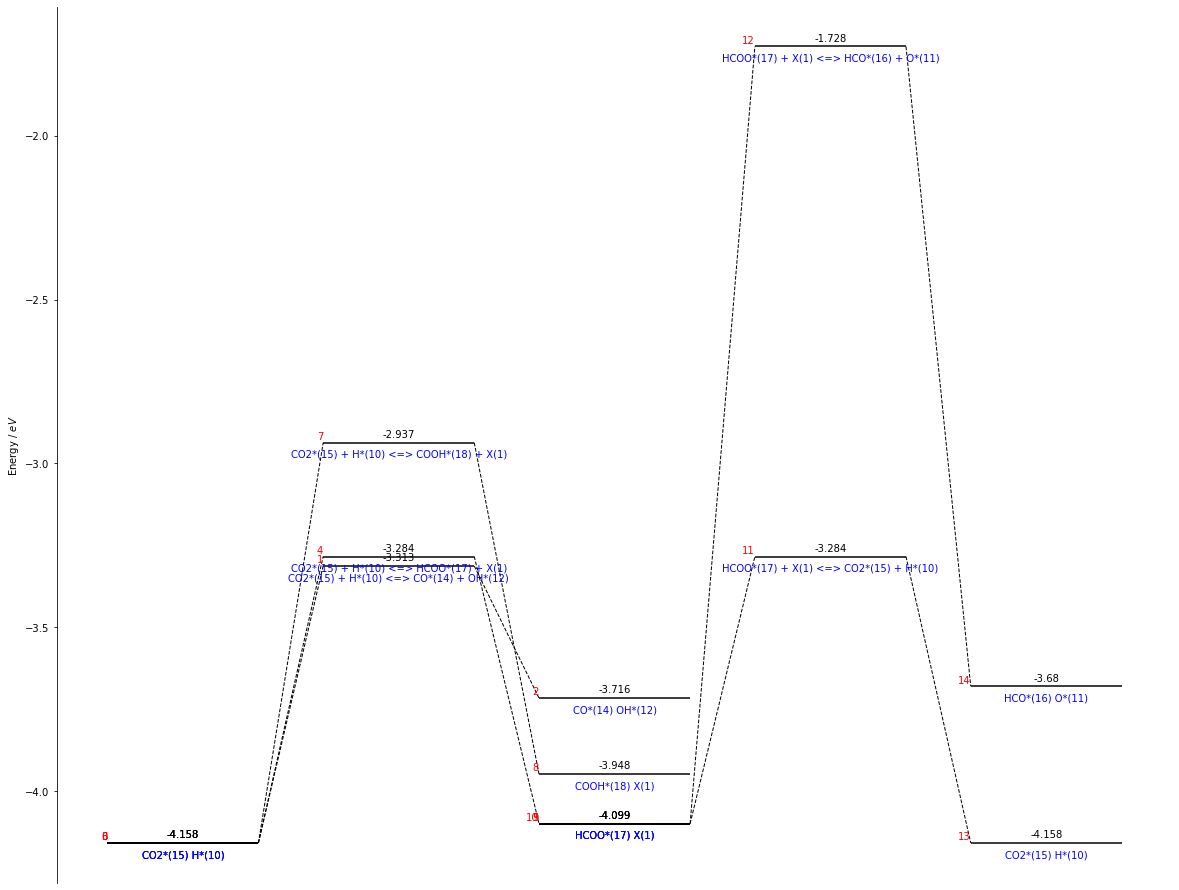

In [22]:
pes_plot_1.add_next_reaction(
    ["HCOO*(17)","X(1)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)
pes_plot_1.diagram.links

In [23]:
pes_plot_1.diagram.data

[(-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.313, 1, 'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)', -3.313, 'k', '', ''),
 (-3.716, 2, 'CO*(14) OH*(12)', -3.716, 'k', '', ''),
 (-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.284, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.284, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-2.937, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.937, 'k', '', ''),
 (-3.948, 2, 'COOH*(18) X(1)', -3.948, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-3.284, 3, 'HCOO*(17) + X(1) <=> CO2*(15) + H*(10)', -3.284, 'k', '', ''),
 (-1.728, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.728, 'k', '', ''),
 (-4.158, 4, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.68, 4, 'HCO*(16) O*(11)', -3.68, 'k', '', '')]

['HCO*(16)', 'O*(11)']
flipped equation:  HCOO*(17) + X(1) <=> HCO*(16) + O*(11) HCO*(16) + O*(11) <=> HCOO*(17) + X(1)


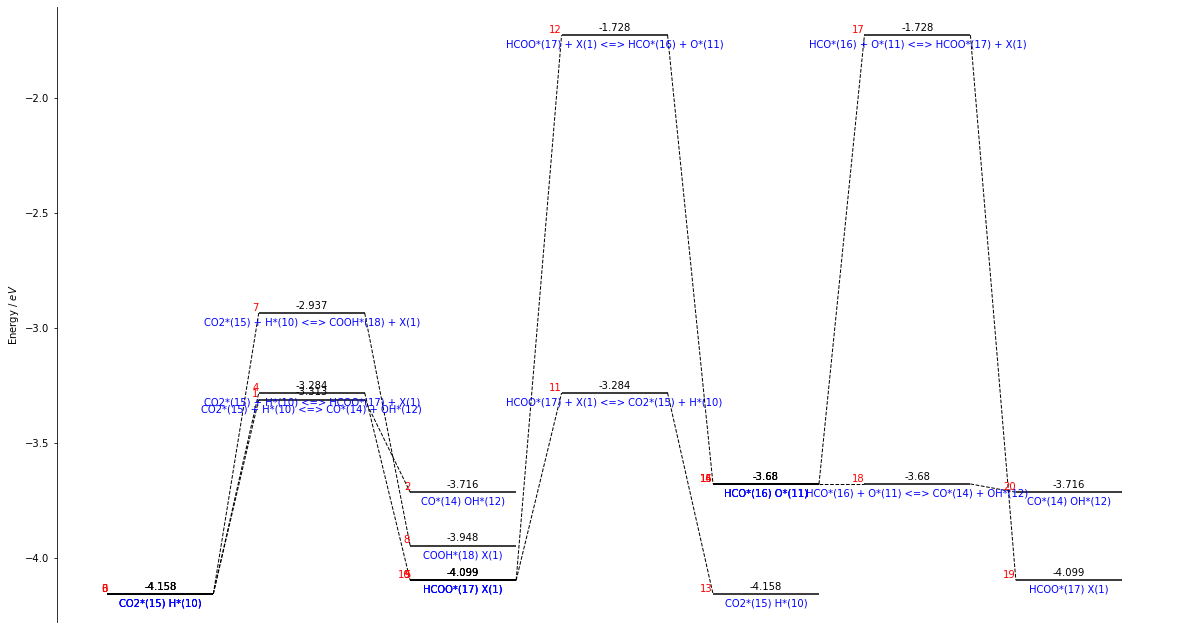

In [24]:
pes_plot_1.add_next_reaction(
    ["HCO*(16)","O*(11)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['CO*(14)', 'OH*(12)']
flipped equation:  HCO*(16) + O*(11) <=> CO*(14) + OH*(12) CO*(14) + OH*(12) <=> HCO*(16) + O*(11)


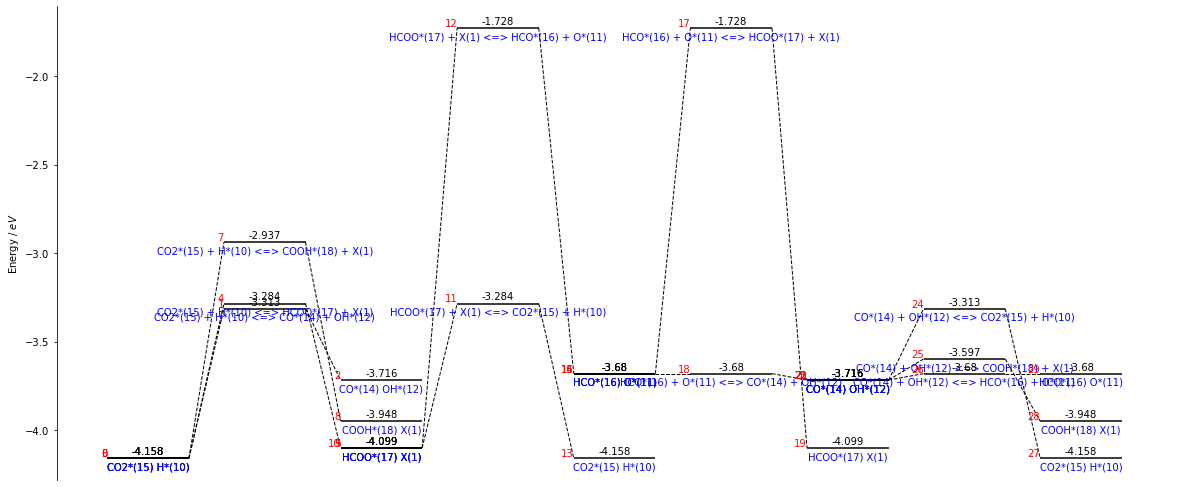

In [25]:
pes_plot_1.add_next_reaction(
    ["CO*(14)","OH*(12)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

In [26]:
pes_plot_1.diagram.data

[(-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.313, 1, 'CO2*(15) + H*(10) <=> CO*(14) + OH*(12)', -3.313, 'k', '', ''),
 (-3.716, 2, 'CO*(14) OH*(12)', -3.716, 'k', '', ''),
 (-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.284, 1, 'CO2*(15) + H*(10) <=> HCOO*(17) + X(1)', -3.284, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-4.158, 0, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-2.937, 1, 'CO2*(15) + H*(10) <=> COOH*(18) + X(1)', -2.937, 'k', '', ''),
 (-3.948, 2, 'COOH*(18) X(1)', -3.948, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-4.099, 2, 'HCOO*(17) X(1)', -4.099, 'k', '', ''),
 (-3.284, 3, 'HCOO*(17) + X(1) <=> CO2*(15) + H*(10)', -3.284, 'k', '', ''),
 (-1.728, 3, 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)', -1.728, 'k', '', ''),
 (-4.158, 4, 'CO2*(15) H*(10)', -4.158, 'k', '', ''),
 (-3.68, 4, 'HCO*(16) O*(11)', -3.68, 'k', '', ''),
 (-3.68, 4, 'HCO*(16) O*(11)', -3.68, 'k', '', ''),
 (-3.68, 4, 'HCO*(16) O*(11)

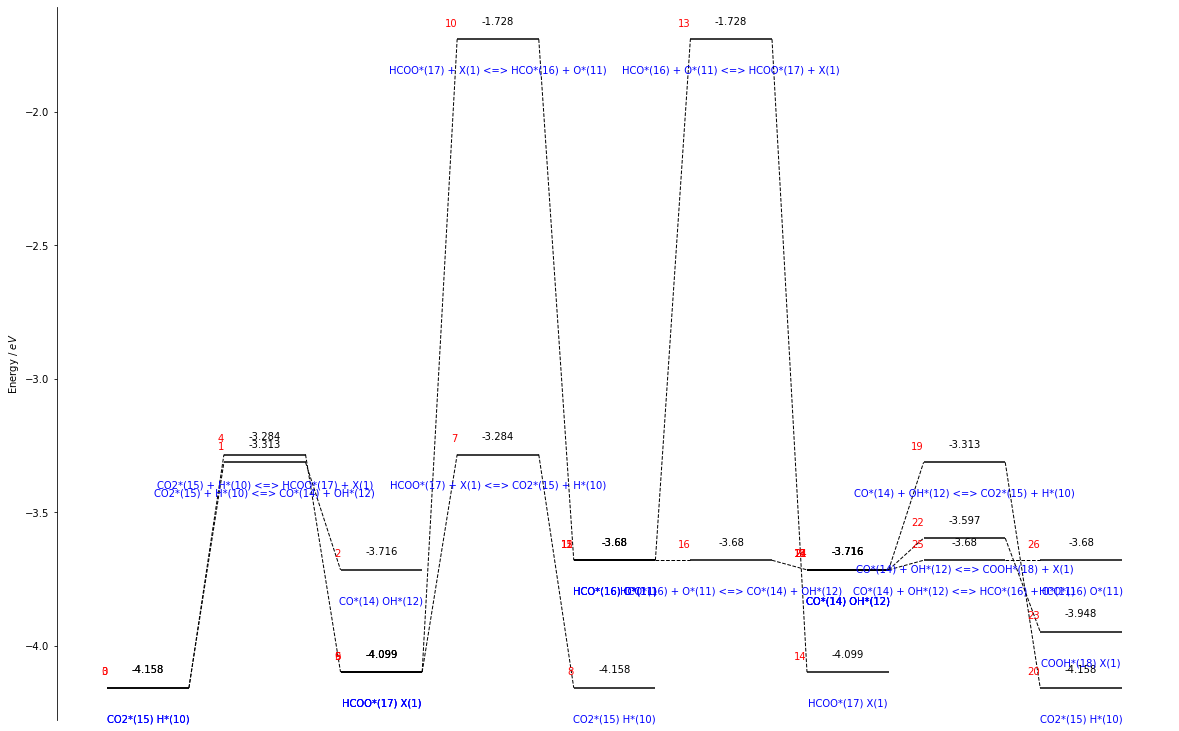

In [27]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> COOH*(18) + X(1)")

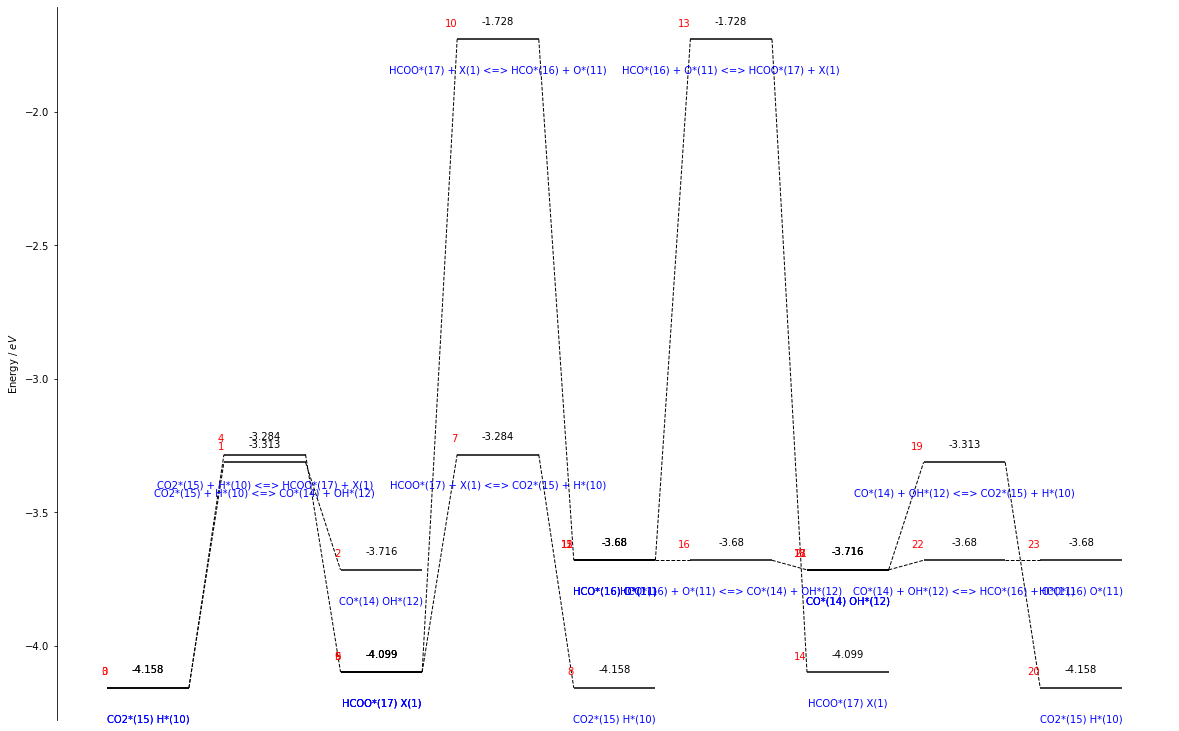

In [28]:
pes_plot_1.trim("CO*(14) + OH*(12) <=> COOH*(18) + X(1)")

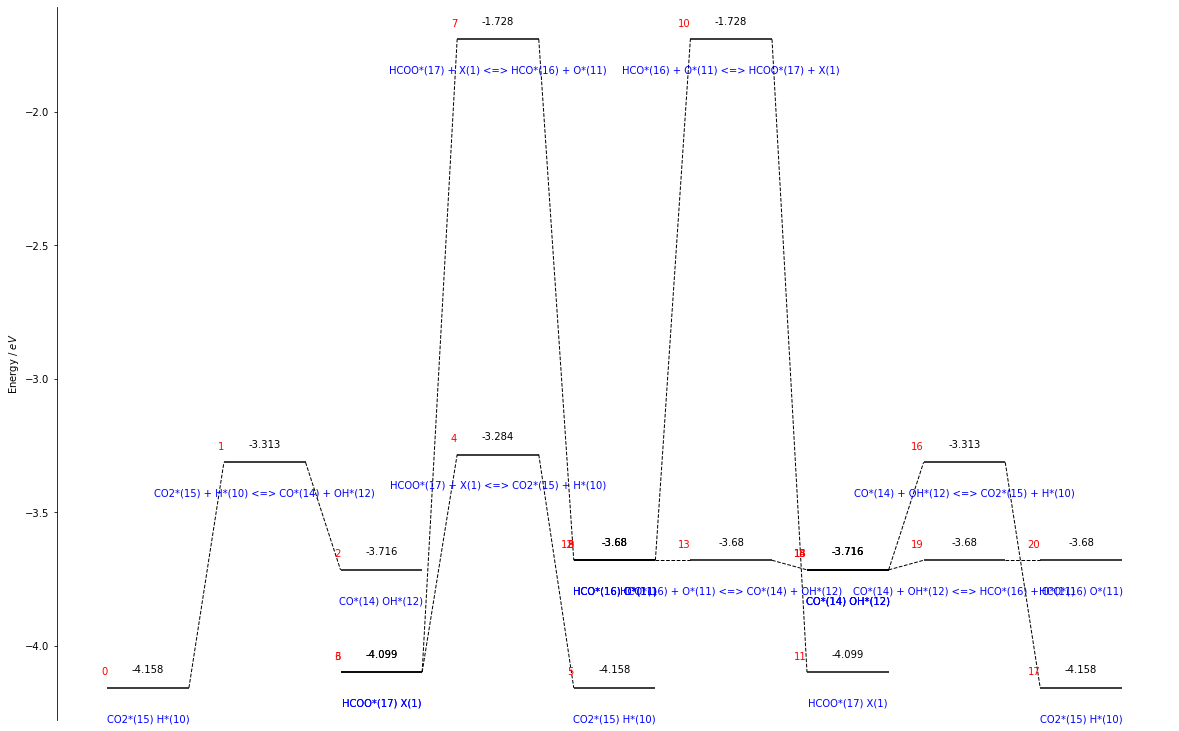

In [29]:
pes_plot_1.trim("CO2*(15) + H*(10) <=> HCOO*(17) + X(1)")

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


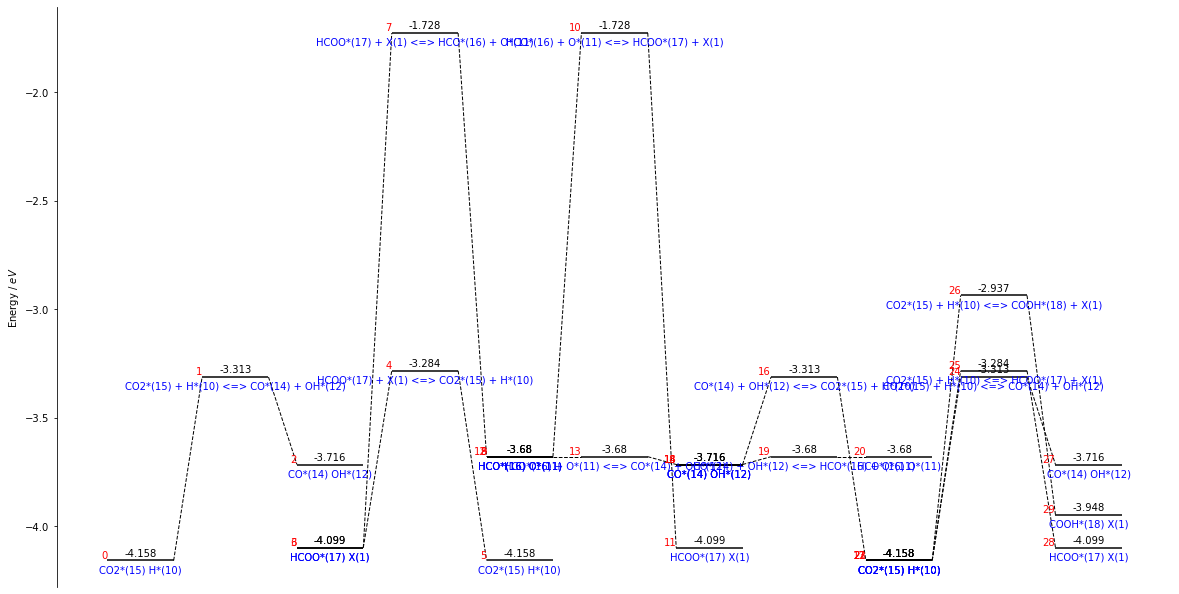

In [30]:
pes_plot_1.add_next_reaction(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

['COOH*(18)']
flipped equation:  HCO*(16) + OH*(12) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> HCO*(16) + OH*(12)
flipped equation:  HCOO*(17) <=> COOH*(18) COOH*(18) <=> HCOO*(17)
flipped equation:  CO2(4) + H*(10) <=> COOH*(18) COOH*(18) <=> CO2(4) + H*(10)
flipped equation:  HCOOH(7) + 2 X(1) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> HCOOH(7) + 2 X(1)
flipped equation:  CO2*(15) + H*(10) <=> COOH*(18) + X(1) COOH*(18) + X(1) <=> CO2*(15) + H*(10)
flipped equation:  CO*(14) + OH*(12) <=> COOH*(18) + X(1) COOH*(18) + X(1) <=> CO*(14) + OH*(12)
flipped equation:  CO*(14) + H2O*(13) <=> COOH*(18) + H*(10) COOH*(18) + H*(10) <=> CO*(14) + H2O*(13)
flipped equation:  CO2*(15) + OH*(12) <=> COOH*(18) + O*(11) COOH*(18) + O*(11) <=> CO2*(15) + OH*(12)
flipped equation:  HCOOH*(19) + O*(11) <=> COOH*(18) + OH*(12) COOH*(18) + OH*(12) <=> HCOOH*(19) + O*(11)
flipped equation:  HCOOH*(19) + OH*(12) <=> COOH*(18) + H2O*(13) COOH*(18) + H2O*(13) <=> HCOOH*(19) + OH*(12)
flipped equation: 

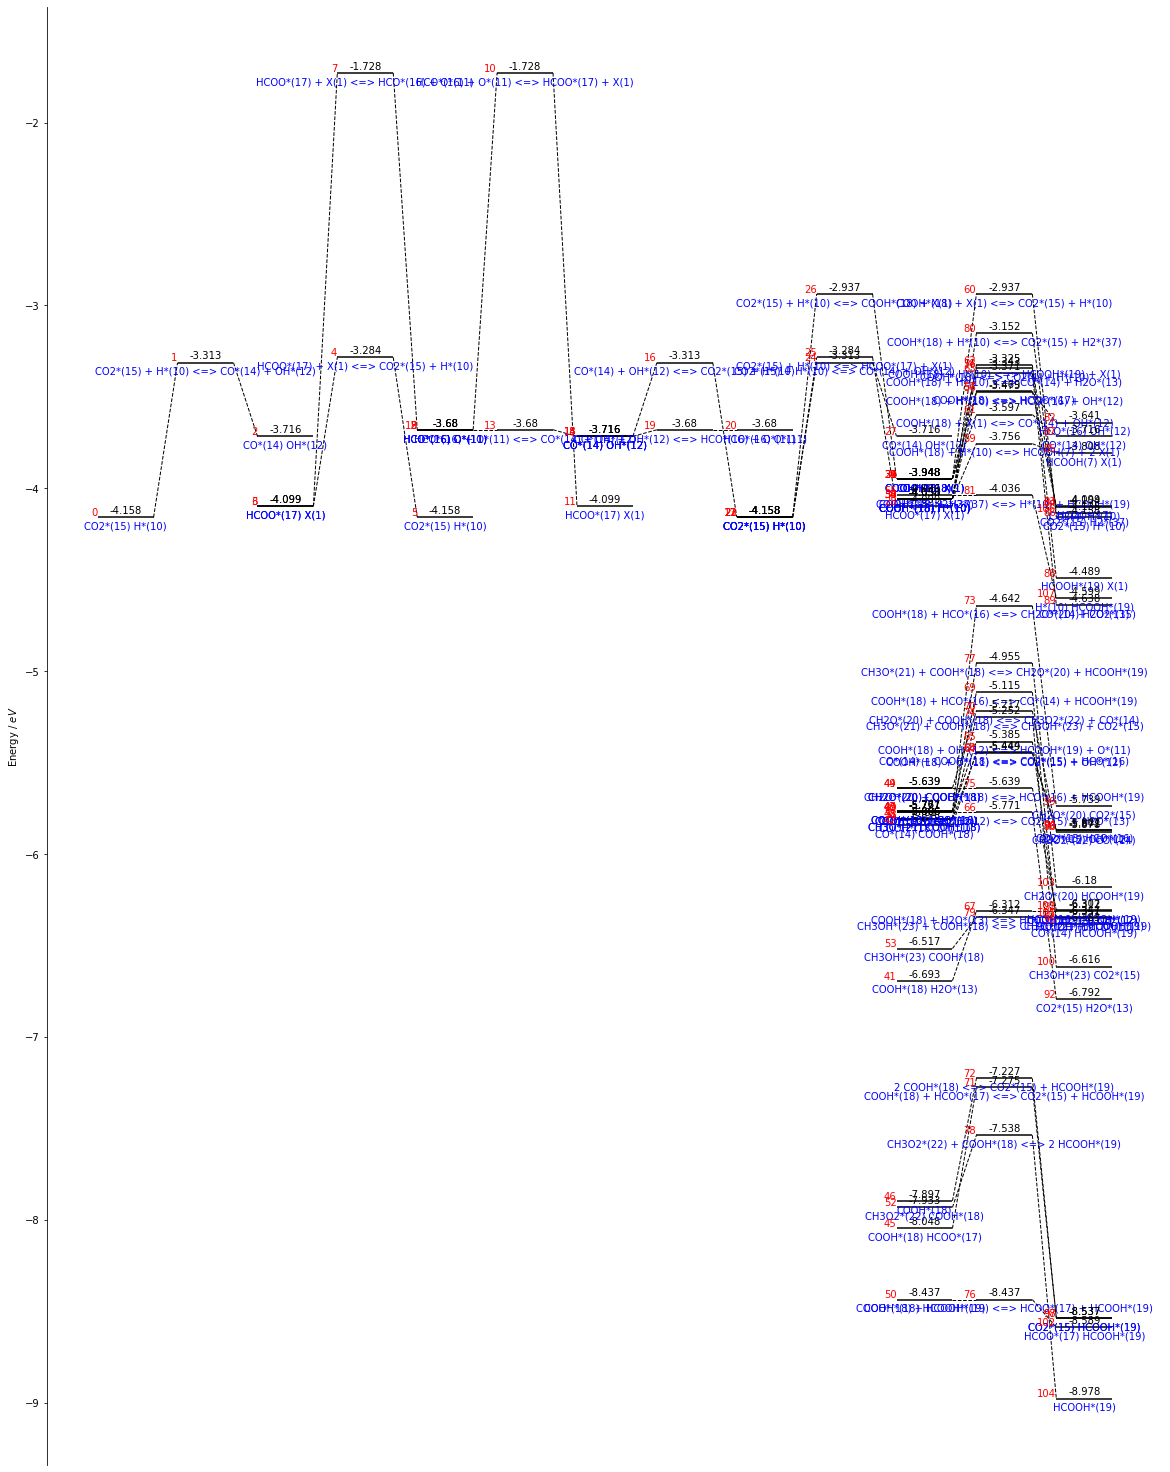

In [31]:
pes_plot_1.add_next_reaction(
    ["COOH*(18)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

## PES_plot_2

In [32]:
pes_plot_2 = pes_plot.pes_plot(cti_file_path)

In [33]:
pes_plot_2.gas.species_names

['N2',
 'Ne',
 'H2(2)',
 'CO(3)',
 'CO2(4)',
 'H2O(5)',
 'CH2O(6)',
 'HCOOH(7)',
 'CH3OH(8)',
 'HCOOCH3(9)',
 'CH4(24)']

In [34]:
pes_plot_2.surf.species_names

['X(1)',
 'H*(10)',
 'O*(11)',
 'OH*(12)',
 'H2O*(13)',
 'CO*(14)',
 'CO2*(15)',
 'HCO*(16)',
 'HCOO*(17)',
 'COOH*(18)',
 'HCOOH*(19)',
 'CH2O*(20)',
 'CH3O*(21)',
 'CH3O2*(22)',
 'CH3OH*(23)',
 'H2*(37)']

['CO2*(15)', 'H*(10)']
flipped equation:  CO*(14) + OH*(12) <=> CO2*(15) + H*(10) CO2*(15) + H*(10) <=> CO*(14) + OH*(12)


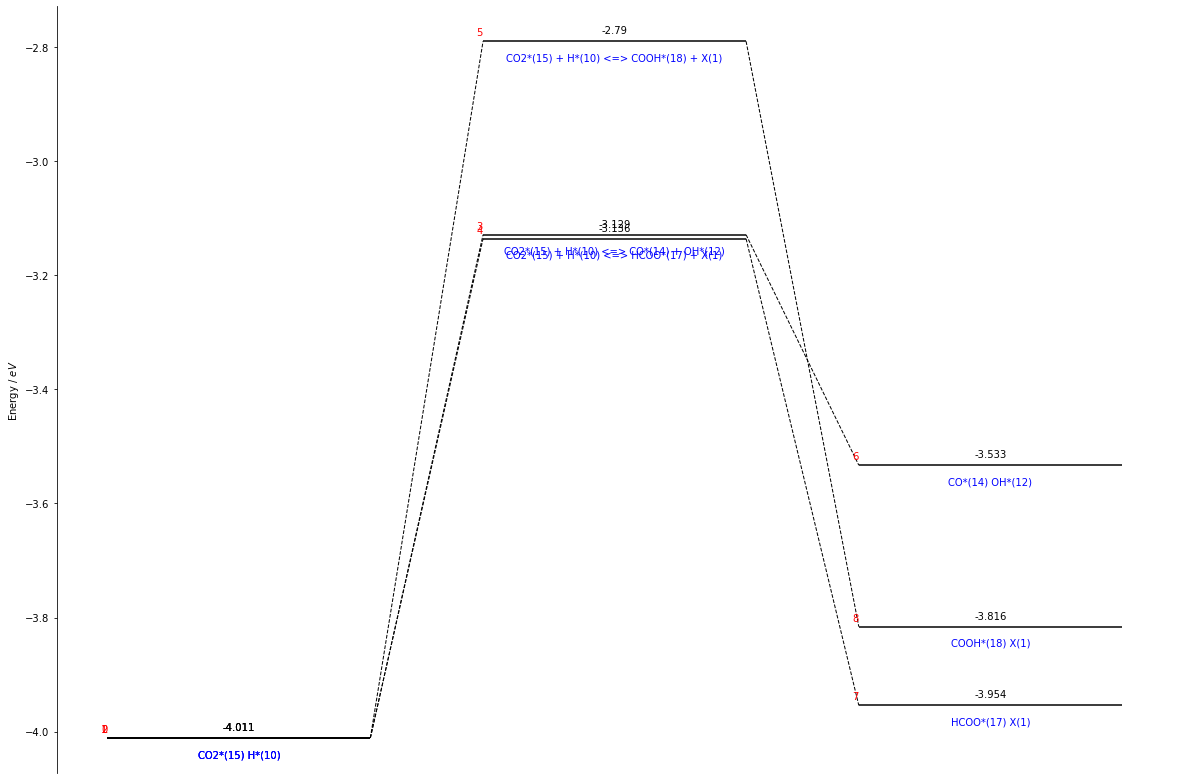

In [35]:
pes_plot_2.plot_pes_diagram(
    ["CO2*(15)","H*(10)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## PES_plot_3

species H2X(53) not found!
[]
flipped equation:  CO(3) + H2(2) <=> CH2O(6) CH2O(6) <=> CO(3) + H2(2)
flipped equation:  CO(3) + H2O(5) <=> HCOOH(7) HCOOH(7) <=> CO(3) + H2O(5)
flipped equation:  CO2(4) + H2(2) <=> HCOOH(7) HCOOH(7) <=> CO2(4) + H2(2)
flipped equation:  CH3OH(8) + CO(3) <=> HCOOCH3(9) HCOOCH3(9) <=> CH3OH(8) + CO(3)
flipped equation:  CH4(24) + CO2(4) <=> HCOOCH3(9) HCOOCH3(9) <=> CH4(24) + CO2(4)
flipped equation:  CO2(4) + H2(2) <=> HCOOH(7) HCOOH(7) <=> CO2(4) + H2(2)
flipped equation:  CO2(4) + H2(2) <=> HCOOH(7) HCOOH(7) <=> CO2(4) + H2(2)
flipped equation:  H2(2) + 2 X(1) <=> 2 H*(10) 2 H*(10) <=> H2(2) + 2 X(1)
flipped equation:  OH*(12) + X(1) <=> H*(10) + O*(11) H*(10) + O*(11) <=> OH*(12) + X(1)
flipped equation:  H2O(5) + X(1) <=> H2O*(13) H2O*(13) <=> H2O(5) + X(1)
flipped equation:  H2O*(13) + X(1) <=> H*(10) + OH*(12) H*(10) + OH*(12) <=> H2O*(13) + X(1)
flipped equation:  H2O*(13) + O*(11) <=> 2 OH*(12) 2 OH*(12) <=> H2O*(13) + O*(11)
flipped equation:  C

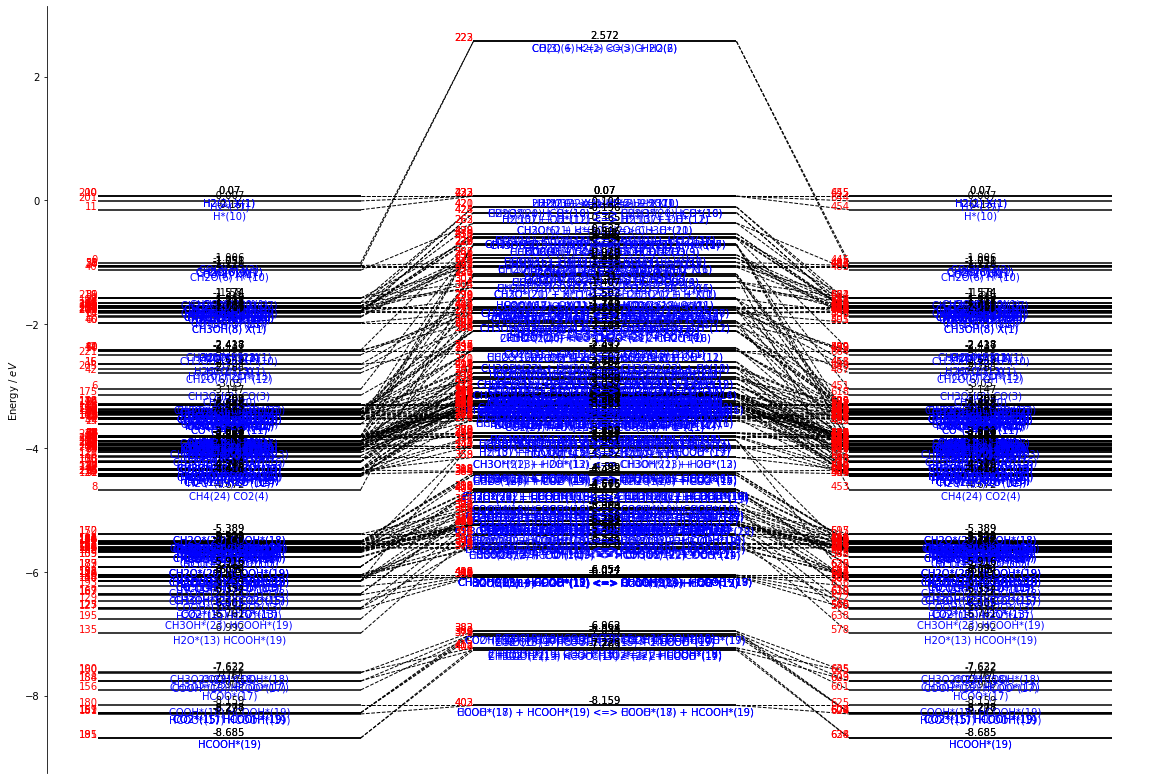

In [36]:
pes_plot_3 = pes_plot.pes_plot(cti_file_path)

pes_plot_3.plot_pes_diagram(
    ["H2X(53)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

## Compare to Bjarne's mechanism

In [37]:
bjarne_file_path = '../../External_data/Bjarne_CO2_mechanism/CO2_hydrogenation_Bjarne.cti'
pes_plot_2 = pes_plot.pes_plot(bjarne_file_path)

In [38]:
pes_plot_2.diagram.links

[]

['site(7)', 'H2(4)']


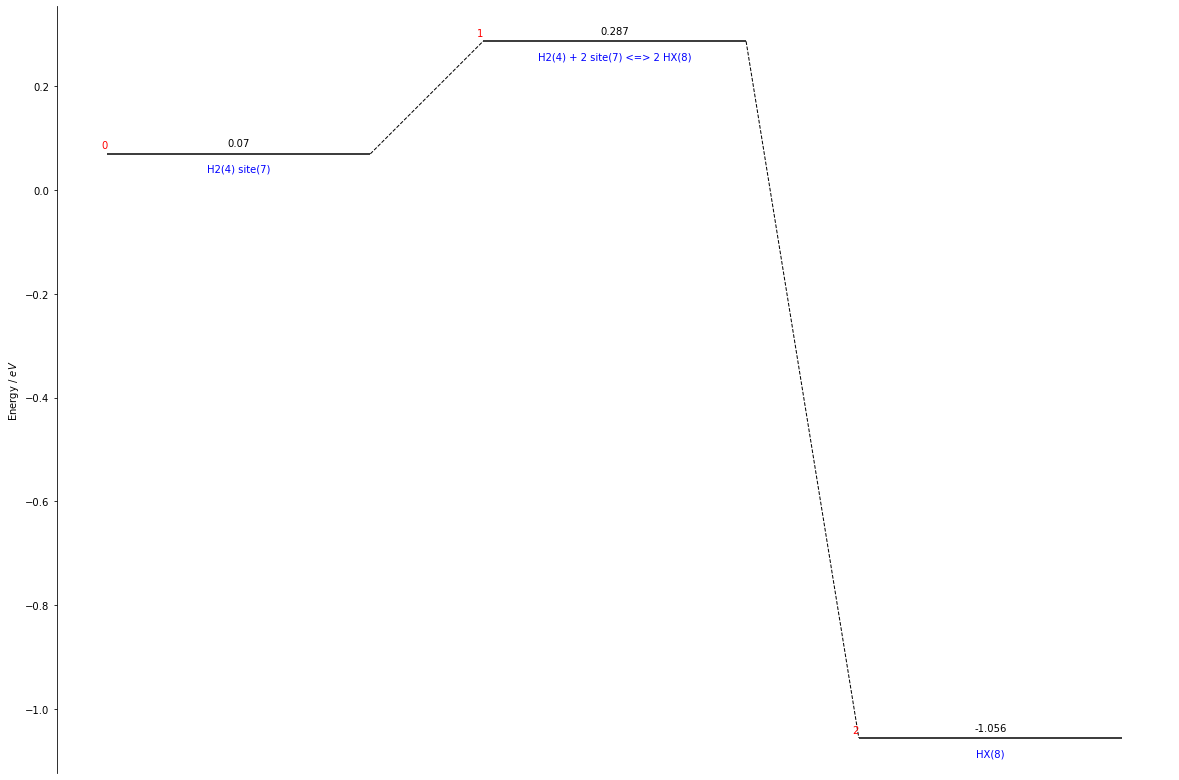

In [39]:
pes_plot_2.plot_pes_diagram(
    ["site(7)","H2(4)"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

In [40]:
str_orig = 'HCOO*(17) + X(1) <=> HCO*(16) + O*(11)'
split_list = str_orig.split("<=>")
str1 = split_list[1] + " <=> " + split_list[0]
str1.strip() 

'HCO*(16) + O*(11) <=> HCOO*(17) + X(1)'

In [41]:
# get current RMG model:
rmg_model_folder = "../../External_data/"
cti_file_path = rmg_model_folder + "mech_grabow_new.cti" # get current RMG model:

In [42]:
pes_plot_4 = pes_plot.pes_plot(cti_file_path)

In [43]:
pes_plot_4.gas.species_names

['CH2O', 'CH3OH', 'CO', 'CO2', 'H2', 'H2O', 'HCOOCH3', 'HCOOH']

['X', 'CO2']


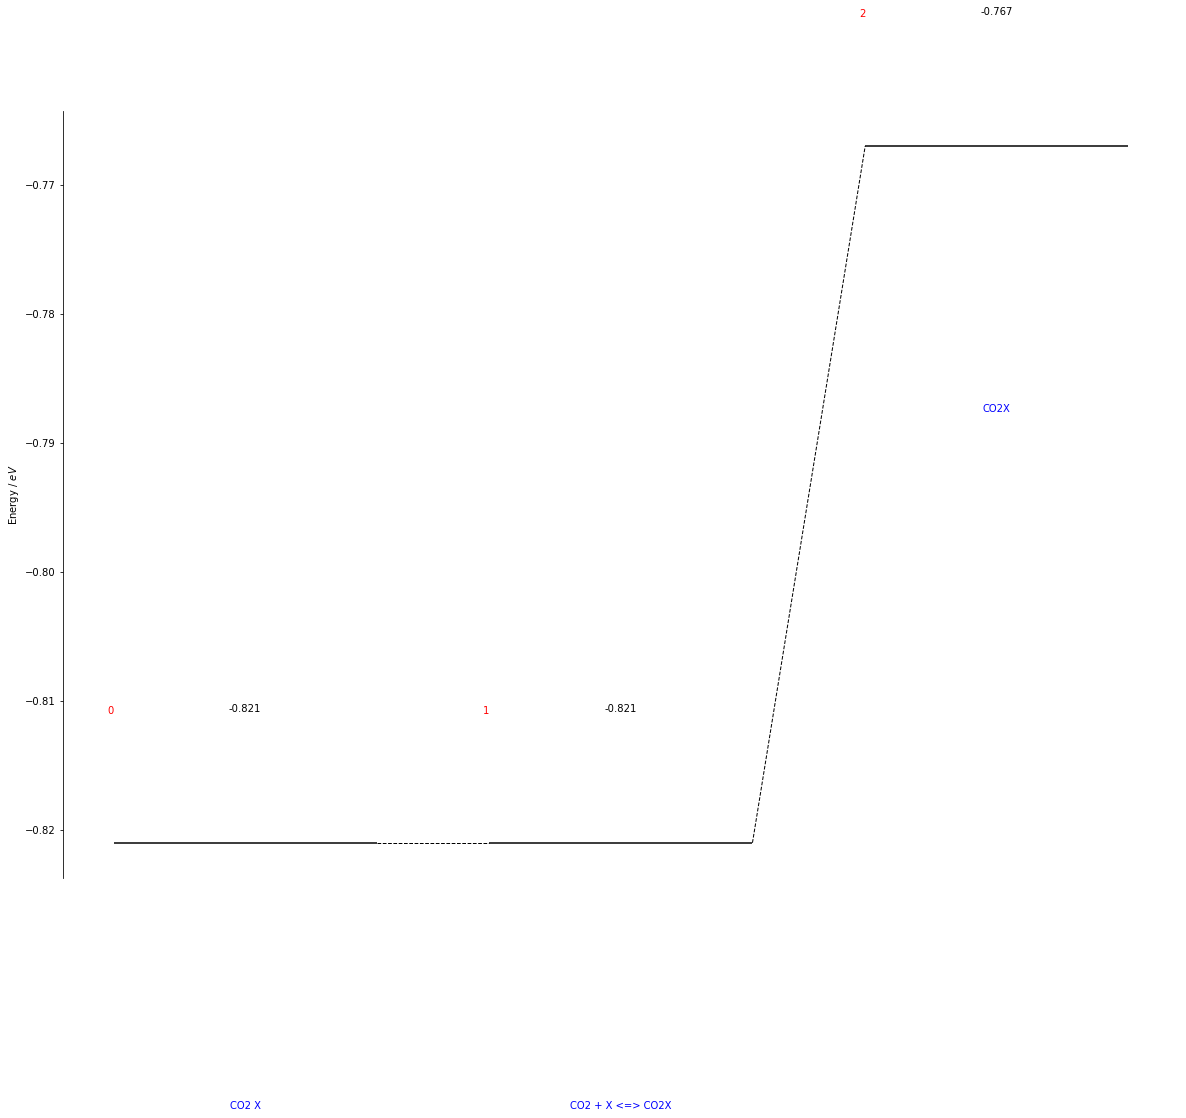

In [44]:
pes_plot_4.plot_pes_diagram(
    ["X","CO2"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
    combined=True
)

['CO2X']
flipped equation:  CO2 + X <=> CO2X CO2X <=> CO2 + X
flipped equation:  COX + OX <=> CO2X + X CO2X + X <=> COX + OX
flipped equation:  COOHX + X <=> CO2X + HX CO2X + HX <=> COOHX + X
flipped equation:  COOHX + OHX <=> CO2X + H2OX CO2X + H2OX <=> COOHX + OHX


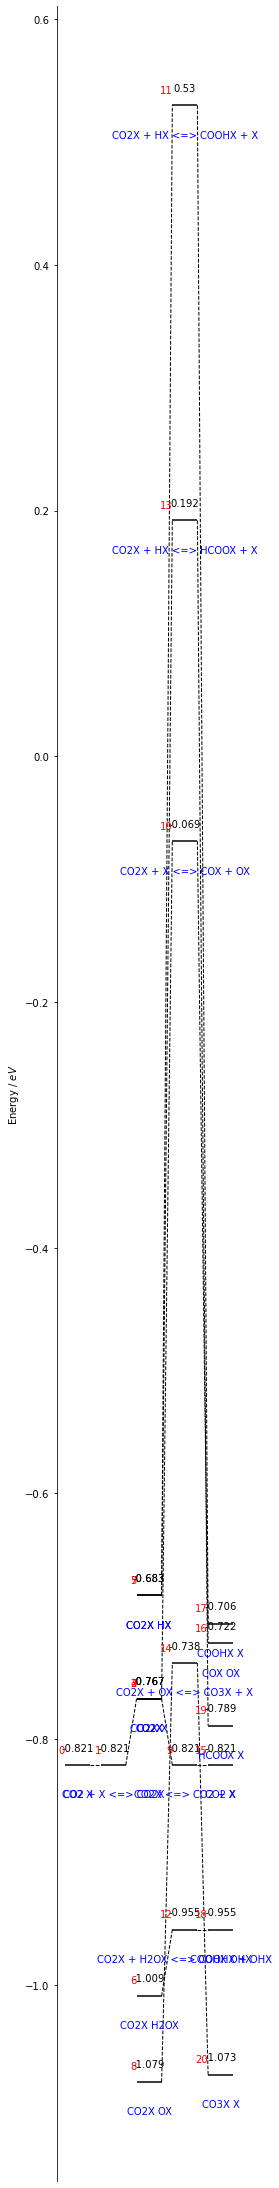

In [45]:
pes_plot_4.add_next_reaction(
    ["CO2X"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

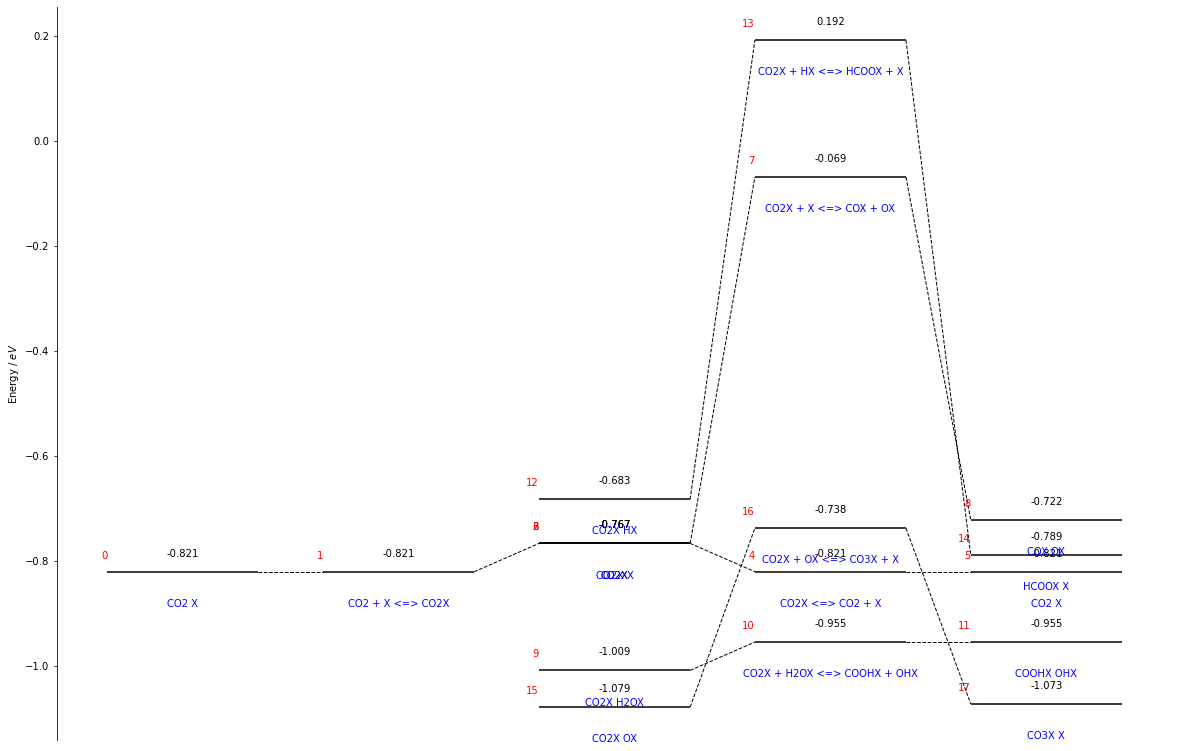

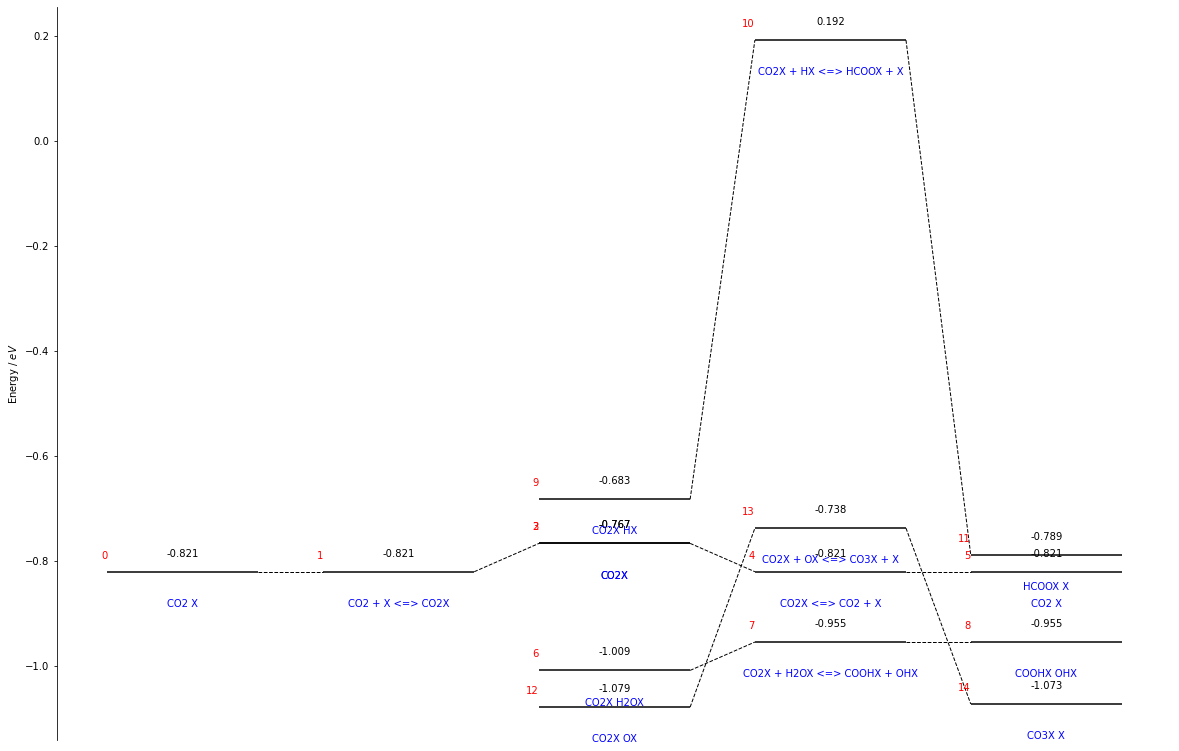

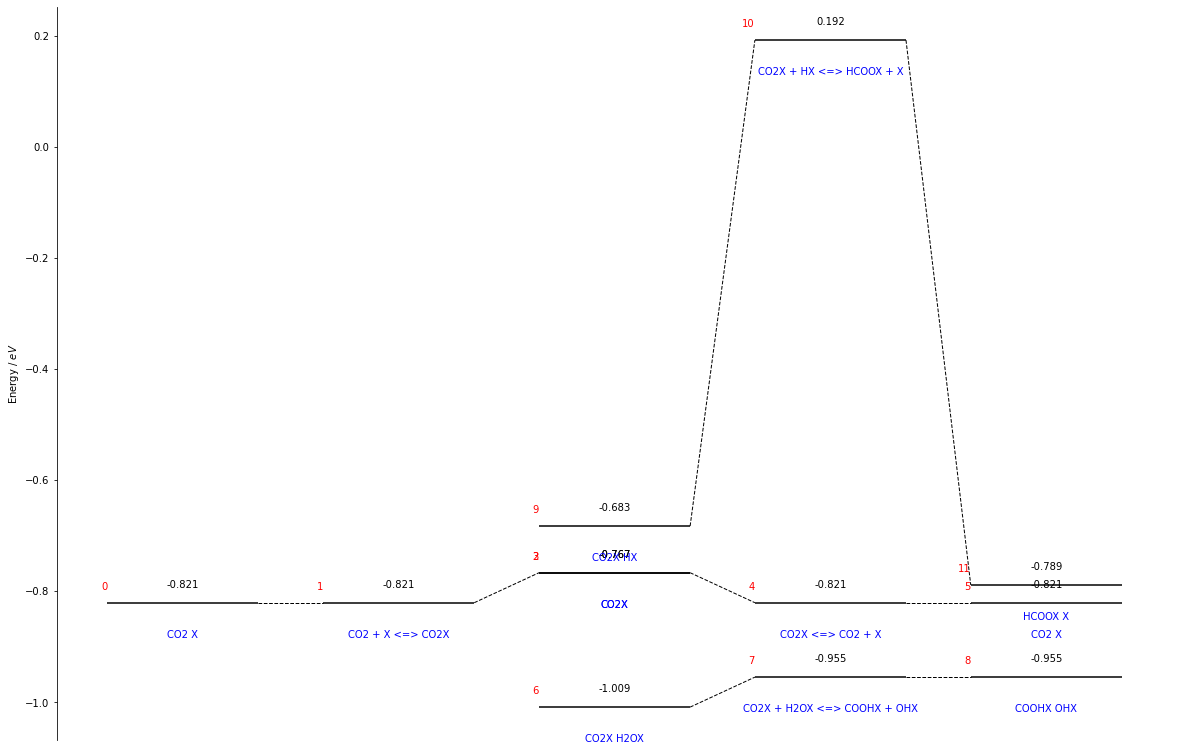

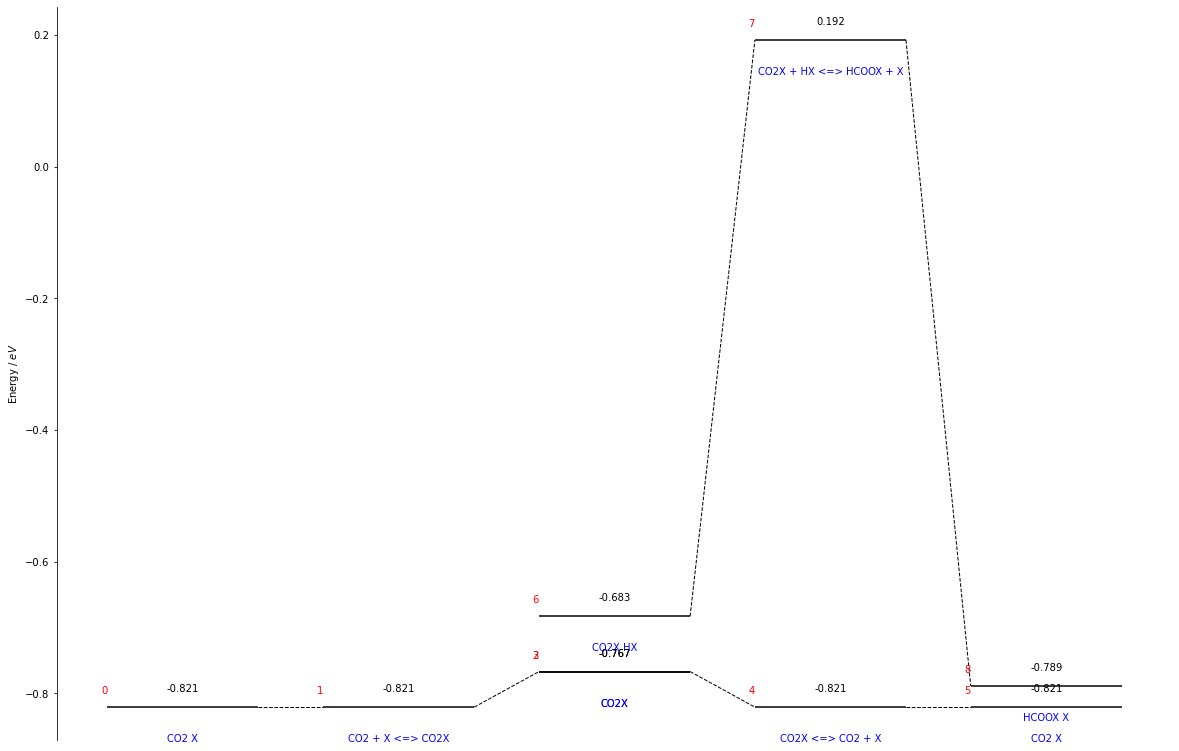

In [46]:
pes_plot_4.trim("CO2X + HX <=> COOHX + X")
pes_plot_4.trim("CO2X + X <=> COX + OX")
pes_plot_4.trim("CO2X + OX <=> CO3X + X")
pes_plot_4.trim("CO2X + H2OX <=> COOHX + OHX")

['HCOOX']
flipped equation:  CO2X + HX <=> HCOOX + X HCOOX + X <=> CO2X + HX


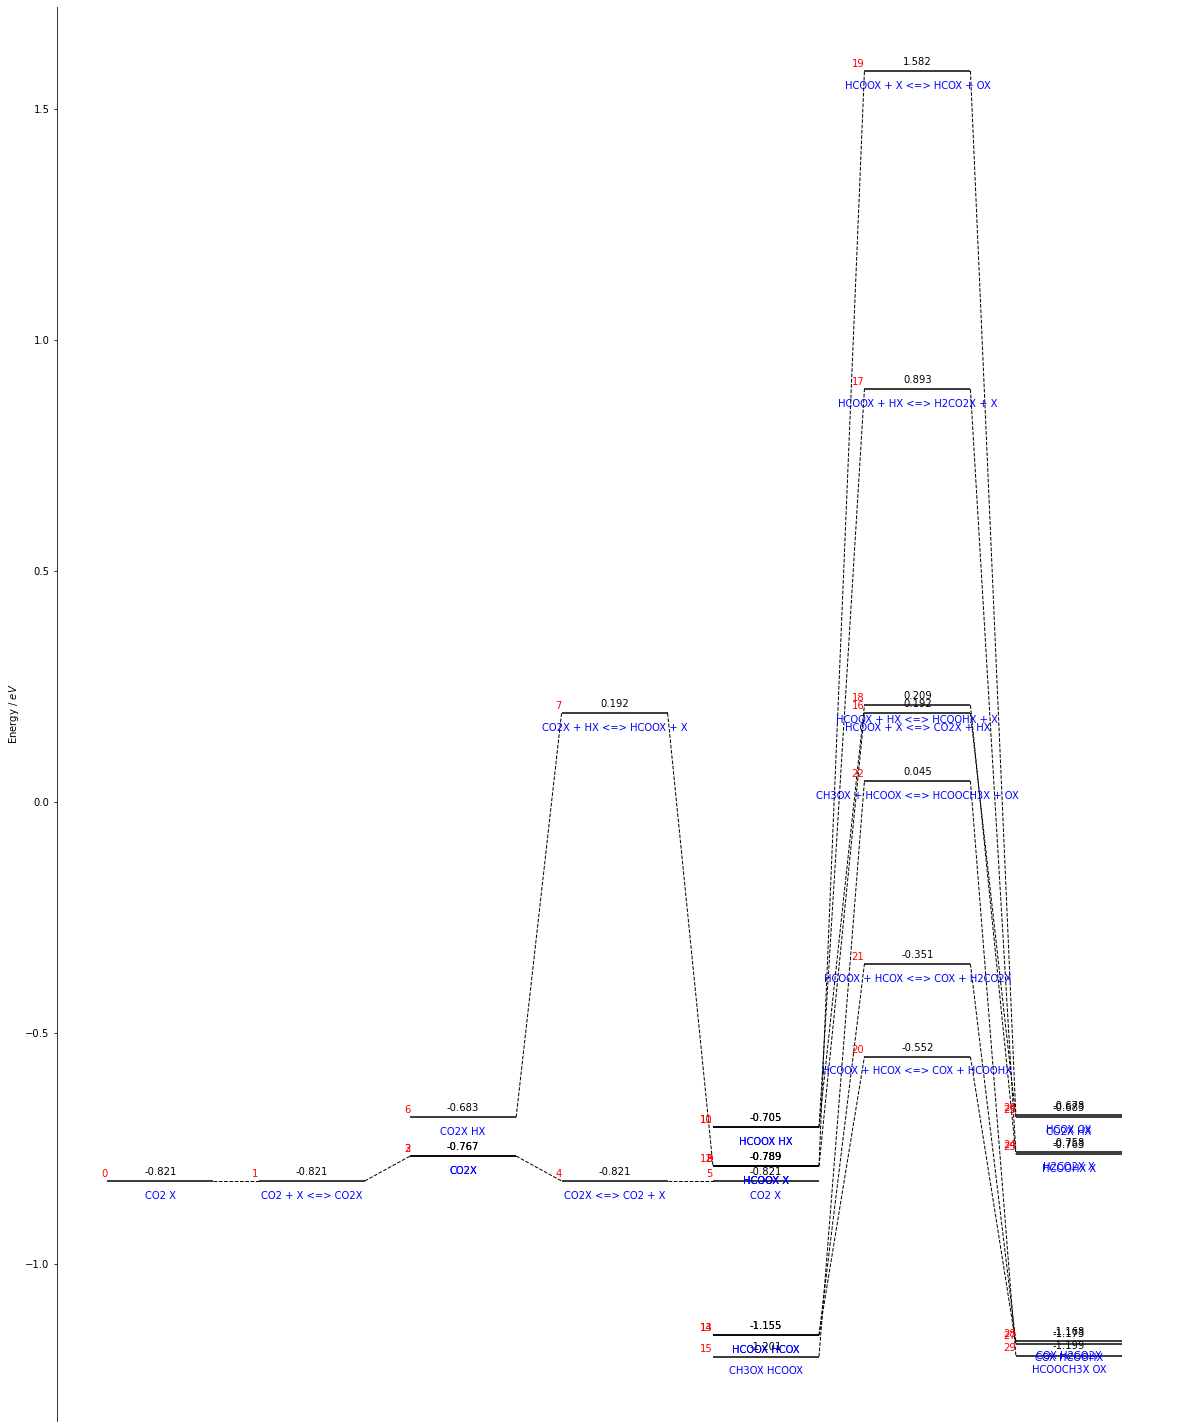

In [47]:
pes_plot_4.add_next_reaction(
    ["HCOOX"],
    width=20, 
    height=40, 
    offset = 0.01,
#     dimension = 10,
#     space = 10, 
)

In [48]:
3*(pes_plot_4.gas.species('H2').thermo.h(499)/1000**2)/96

0.3662519713804835

In [49]:
6*(pes_plot_4.surf.species('HX').thermo.h(528)/1000**2)/96

0.5054528890906611